
##  Exam - Fashion MNIST Convolutional Neural Networks (CNNs)

GSERM'22 course "Deep Learning: Fundamentals and Applications", University of St. Gallen

Kayla Kahn

This week we have learned how to enhance vanilla Artificial Neural Networks (ANNs) using `PyTorch` to classify even more complex images. For this purpose, we used a special type of deep neural network referred to **Convolutional Neural Networks (CNNs)**. In our exam exercise, we aim to leverage that knowledge by applying it to the known Fashion-MNIST dataset.

As always, pls. don't hesitate to post your potential questions on CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email: aiml-teaching.ics@unisg.ch).

## 1. Assignment Objectives:

As discussed in our last session, these are the tasks for the exam exercise:

> 1. Load the Fashion **MNIST dataset**.
> 2. Implement a **CNN** architecture able to work with this data.
> 3. **Train** the model, evaluate its **performance** and visualize the results.
> 4. Try to **improve** the performance of the initial model.
> 5. **Document** the results in the form of PowerPoint slides.

But before we do so let's start (as always) with a motivational video by NVIDIA. Happy coding!

In [ ]:
from IPython.display import YouTubeVideo
# Official Intro | GTC 2020 | I AM AI"
# YouTubeVideo('e2_hsjpTi4w', width=800, height=500)

## 2. Setup of the Jupyter Notebook Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. We will mostly use the `PyTorch`, `Numpy`, `Sklearn`, `Matplotlib`, `Seaborn` and a few utility libraries throughout this lab:

In [1]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

Import Python machine / deep learning libraries:

In [2]:
# import the PyTorch deep learning library
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

Import the sklearn classification metrics:

In [3]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Import Python plotting libraries:

In [4]:
# import matplotlib, seaborn, and PIL data visualization libary
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Enable notebook matplotlib inline plotting:

In [5]:
%matplotlib inline

Import Google's GDrive connector and mount your GDrive directories:

In [6]:
# import the Google Colab GDrive connector
from google.colab import drive

# mount GDrive inside the Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


Create a structure of Colab Notebook sub-directories inside of GDrive to store (1) the data as well as (2) the trained neural network models:

In [7]:
# create Colab Notebooks directory
notebook_directory = '/content/drive/MyDrive/Colab Notebooks'
if not os.path.exists(notebook_directory): os.makedirs(notebook_directory)

 # create data sub-directory inside the Colab Notebooks directory
data_directory = '/content/drive/MyDrive/Colab Notebooks/data'
if not os.path.exists(data_directory): os.makedirs(data_directory)

 # create models sub-directory inside the Colab Notebooks directory
models_directory = '/content/drive/MyDrive/Colab Notebooks/models'
if not os.path.exists(models_directory): os.makedirs(models_directory)

Set a random `seed` value to obtain reproducable results:

In [8]:
# init deterministic seed
seed_value = 1234
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU

Google Colab provides the use of free GPUs for running notebooks. However, if you just execute this notebook as is, it will use your device's CPU. To run the lab on a GPU, got to `Runtime` > `Change runtime type` and set the Runtime type to `GPU` in the drop-down. Running this lab on a CPU is fine, but you will find that GPU computing is faster. *CUDA* indicates that the lab is being run on GPU.

Enable GPU computing by setting the `device` flag and init a `CUDA` seed:

In [9]:
# set cpu or gpu enabled device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu').type

# init deterministic GPU seed
torch.cuda.manual_seed(seed_value)

# log type of device enabled
print('[LOG] notebook with {} computation enabled'.format(str(device)))

[LOG] notebook with cuda computation enabled


Let's determine if we have access to a GPU provided by e.g. Google's COLab environment:

In [10]:
!nvidia-smi

Mon Apr 28 20:36:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 3. Exam Exercise: Convolutional Neural Networks (CNNs)

The **Fashion-MNIST database** is a large database of Zalando articles that is commonly used for training various image processing systems. The database is widely used for training and testing in the field of machine learning. Source: https://www.kaggle.com/c/insar-fashion-mnist-challenge

The Fashion-MNIST database has 70,000 total images and is pre-divided into 60,000 training images and 10,000 test images.

### 3.1 Fashion-MNIST Dataset Download and Data Assessment

Set a directory to store the training data when it is downloaded.

In [11]:
# define train path
# 'data_directory' is defined in a chunk above
train_path = data_directory + '/train_fmnist'

Next we download the training data. We first define a transformation to download the images as tensor format, or 28x28 matrices of pixels of grayscale values. This is what the computer understands rather than what the human eye sees/understands.

In [12]:
# define transformation into tensor format
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# download and transform the training images
# use the train path we defined above, train = TRUE says to use train not evaluation set,
# use the transformation we just defined
fashion_mnist_train_data = torchvision.datasets.FashionMNIST(root=train_path, train=True, transform=transf, download=True)

To make sure it downloaded correctly, we can assess the length of the data we just downloaded. It should be 60,000.

In [13]:
len(fashion_mnist_train_data)

60000

We can also look at some of the images. The transformation we used said to download as a tensor, so that is what we should get.

In [14]:
# select an image id
image_id = 29000

# retrieve the image that has this id
fashion_mnist_train_data[image_id]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

We see with the image information above that it presents as a tensor. The very last number (7 for this chosen id) is the image label. We can also separate the image from the label. The labels are numbers but we can map this to the fashion item (shown on Zalando github page) so that the labels have meaning for us.

In [15]:
# separate image from label
fashion_mnist_train_image, fashion_mnist_train_label = fashion_mnist_train_data[image_id]

# see the label for the image we looked at
print(fashion_mnist_train_label)

# map number labels to fashion items
fashion_classes = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}

# see the fashion item that the label represents
fashion_classes[fashion_mnist_train_label]

7


'Sneaker'

So we see that our chosen image id is label 7 which is sneaker.

We can also turn the image from a tensor to an image that the human eye can make sense of so that we can look at whether this is really a sneaker.

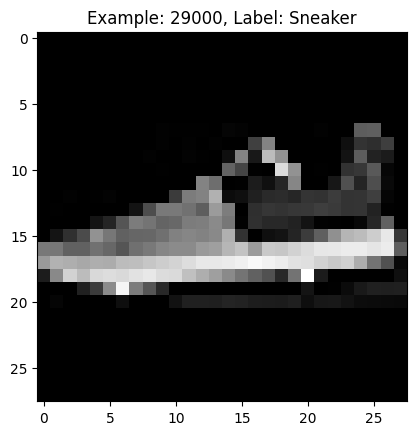

In [16]:
# tensor to image transformation
trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: {}'.format(str(image_id), fashion_classes[fashion_mnist_train_label]))

# plot the fashion image
plt.imshow(trans(fashion_mnist_train_image), cmap='gray')

We also need the evaluation data. We define the directory and additionally define a transformation to tensors just as we did for the training data.

In [17]:
# define the directory in which to store the evaluation data
eval_path = data_directory + '/eval_fmnist'

# define pytorch transformation into tensor format
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# download and transform training images
# train set to False this time in order to get the evaluation set instead of the train set
fashion_mnist_eval_data = torchvision.datasets.FashionMNIST(root=eval_path, train=False, transform=transf, download=True)

Check the length of the evaluation data as a verification. It should be 10,000.

In [18]:
len(fashion_mnist_eval_data)

10000

### 3.2 Convolutional Neural Network (CNN) Model Training and Evaluation

<img align="center" style="max-width: 900px" src="https://github.com/HSG-AIML/LabAI-Coding/blob/main/resources/lab_05/classification.png?raw=1">

Please note this image of a CNN was defined for the CIFAR-10 dataset. Your Fashion-MNIST images have a different size.


####**1. Implement and train your "baseline" CNN.**

First we define the architecture of the baseline CNN.

In [19]:
# implement the network architecture
# (nn.Module gets the functionalities from the pytorch module)
class FashionMnistCNN(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(FashionMnistCNN, self).__init__()

        # specify convolution layer 1. (1 input channel w/ grayscale. output = features to extract)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=0)
        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # specify convolution layer 2. (input channels = output from before)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0)
        # define max-pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # classification part
        # specify first fully connected layer
        self.linear1 = nn.Linear(64*4*4, 600, bias=True) # linearity
        self.relu1 = nn.ReLU(inplace=True) # non-linearity
        # fully connected layer 2
        self.linear2 = nn.Linear(600, 120, bias=True)
        self.relu2 = nn.ReLU(inplace=True)
        # fully connected layer 3 (output is 10 for 10 fashion mnist classes)
        self.linear3 = nn.Linear(120, 10)
        # feed output of 3rd fc through softmax
        self.logsoftmax = nn.LogSoftmax(dim=1)

    # where it is glued together
    # define the forward pass
    def forward(self, images):

        # high level feature learning via convolutional layers
        # define conv layer 1 forward pass, max pooling, relu sneaks in a nonlinearity to help with learning
        x = self.pool1(self.relu1(self.conv1(images)))
        # define conv layer 2 forward pass
        x = self.pool2(self.relu2(self.conv2(x)))

        # feature flattening
        # reshape image pixels
        x = x.view(x.size(0), -1)

        # combination of feature learning via non-linear layers
        # define fully connected layer 1 forward pass
        x = self.relu1(self.linear1(x))
        # define fc layer 2 forward pass
        x = self.relu2(self.linear2(x))
        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x


Initialize model to be trained and push it to the device that we enabled.

In [20]:
# instantiate model
model = FashionMnistCNN()
# push to device
model = model.to(device)
# if GPU is enabled we can double check that the model was pushed there
!nvidia-smi

Mon Apr 28 20:37:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P0             28W /   70W |     124MiB /  15360MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Now that the model is initialized we can take a look at the network architecture to review the model structure. We can also look at the number of parameters that we will be training.

In [21]:
# look at the architecture
print('[LOG] FashionMnistCNN architecture:\n\n{}\n'.format(model))

# look at the parameters
# first initialize the number of paramters
num_params = 0
# iterate over the distinct parameters
for param in model.parameters():
    # collect number of parameters
    num_params += param.numel()
#print number of parameters
print('[LOG] Number of FashionMnistCNN model parameters to be trained: {}.'.format(num_params))

[LOG] FashionMnistCNN architecture:

FashionMnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1024, out_features=600, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=600, out_features=120, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=120, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

[LOG] Number of FashionMnistCNN model parameters to be trained: 740426.


We use negative log-likelihood loss which penalizes models that have a high error between the predicted class and true class. The loss function should be pushed to the same computing device that the model is on. We also need to define the learning rate and optimization strategy.

In [22]:
# define loss function
nll_loss = nn.NLLLoss()
#push initialized loss function to device
nll_loss = nll_loss.to(device)

# define learning rate
learning_rate = .001
# define optimization strategy (stochastic gradient descent)
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

For training the model, we will use a mini-batch size of 128 images per batch and will train for 20 epochs. 20 epochs says that we will show the 60,000 training images to the network 20 times as part of the training process. The mini-batch size says that the dataset being fed to the network 20 times will be done in chunks of 128 images.

We also initialize a dataloader to feed the image tensors to the neural network.

In [23]:
num_epochs = 20
mini_batch_size = 128

# dataloader
fashion_mnist_train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train_data, batch_size=mini_batch_size, shuffle=True)

Model training

In [24]:
# initialize collection of training epoch losses
train_epoch_losses = []

# set model in training mode
model.train()

# training the model
# iterate over the 20 epochs
for epoch in range(num_epochs):

    # initialize collection of mini-batch losses
    train_mini_batch_losses = []
    # iterate over all mini-batches
    for i, (images, labels) in enumerate(fashion_mnist_train_dataloader):
        # push mini-batch data to device
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        output = model(images)
        # reset graph gradients
        model.zero_grad()
        #determine classification loss
        loss = nll_loss(output, labels)

        # backward pass -- take the loss
        loss.backward()
        # calculate new parameters based on the loss
        optimizer.step()
        # collect mini-batch reconstruction loss
        train_mini_batch_losses.append(loss.data.item())

    # determine mean mini-batch loss for epoch
    train_epoch_loss = np.mean(train_mini_batch_losses)
    # print epoch loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))

    # set filename of model -- generate new name for each epoch
    model_name = 'fashion_mnist_model_epoch_{}.pth'.format(str(epoch))
    # save current model to gdrive models directory
    torch.save(model.state_dict(), os.path.join(models_directory, model_name))

    # append mean mini-batch loss of epoch
    train_epoch_losses.append(train_epoch_loss)

[LOG 20250428-20:37:54] epoch: 0 train-loss: 2.301276657881259
[LOG 20250428-20:38:03] epoch: 1 train-loss: 2.2973659587567297
[LOG 20250428-20:38:12] epoch: 2 train-loss: 2.293265273576098
[LOG 20250428-20:38:24] epoch: 3 train-loss: 2.288257462637765
[LOG 20250428-20:38:33] epoch: 4 train-loss: 2.2817682752222903
[LOG 20250428-20:38:42] epoch: 5 train-loss: 2.2725005114256445
[LOG 20250428-20:38:50] epoch: 6 train-loss: 2.2578722174996253
[LOG 20250428-20:38:59] epoch: 7 train-loss: 2.2325590114349496
[LOG 20250428-20:39:09] epoch: 8 train-loss: 2.1837173296190273
[LOG 20250428-20:39:17] epoch: 9 train-loss: 2.074652994365326
[LOG 20250428-20:39:25] epoch: 10 train-loss: 1.8234596005889143
[LOG 20250428-20:39:35] epoch: 11 train-loss: 1.4717955683340143
[LOG 20250428-20:39:43] epoch: 12 train-loss: 1.2306175882628223
[LOG 20250428-20:39:51] epoch: 13 train-loss: 1.1021405124206787
[LOG 20250428-20:40:01] epoch: 14 train-loss: 1.0300569860919961
[LOG 20250428-20:40:09] epoch: 15 train

Now that the model has been trained, we can plot the training loss per epoch in order to visualize it.

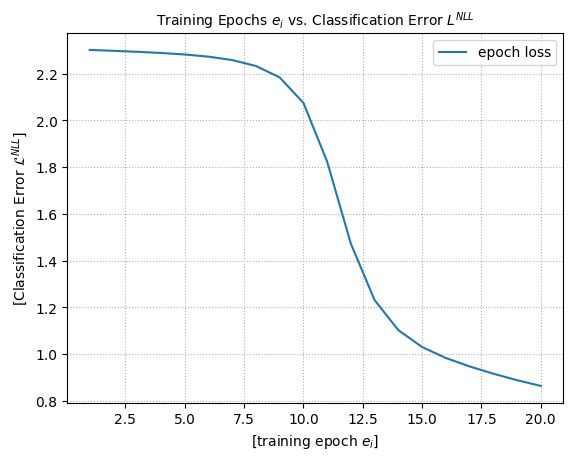

In [25]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle='dotted') # add grid

# plot the training epochs vs. the epochs' classification error
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss')

# add axis labels and title
ax.set_xlabel("[training epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)
plt.title('Training Epochs $e_i$ vs. Classification Error $L^{NLL}$', fontsize=10)

# set plot legend
plt.legend(loc="upper right", numpoints=1, fancybox=True)

We can see in the above plot of the loss that the model is definitely learning with each epoch, but the loss is still pretty high. We also can see that 20 epochs was not enough time to converge - the model looks like it was still learning (i.e. the loss would still have dropped quite a bit if given more epochs).

Now we are ready to evaluate the model with the images it has not seen before.

####Evaluating the model

First we will load the best performing model from our model snapshots from training. In this case, it was the last model snapshot - the 19th epoch.

In [26]:
# restore pre-trained model snapshot
best_model_name = '/content/drive/MyDrive/Colab Notebooks/models/fashion_mnist_model_epoch_19.pth'

# init pre-trained model class
best_model = FashionMnistCNN()

# load epoch 19 (best performing epoch) of trained model and put it on cpu (as opposed to gpu)
best_model.load_state_dict(torch.load(best_model_name, map_location=torch.device('cpu')))


<All keys matched successfully>

We can make sure the model loaded successfully.

In [27]:
# set model in evaluation mode
best_model.eval()

FashionMnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1024, out_features=600, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=600, out_features=120, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=120, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

We can use the PyTorch dataloader for the evaluation images, which are the images that the model has not seen yet (the images the model was not trained on).

In [28]:
fashion_mnist_eval_dataloader = torch.utils.data.DataLoader(fashion_mnist_eval_data, batch_size=10000, shuffle=False)

Evaluate the model with the mini-batch approach and compute the mean negative log-likelihood loss of all of the mini-batches that are processed in an epoch.

In [29]:
# initialize collection of mini-batch losses
eval_mini_batch_losses = []

# iterate over all mini-batches
for i, (images, labels) in enumerate(fashion_mnist_eval_dataloader):

    # forward pass
    output = best_model(images)

    # determine classification loss
    loss = nll_loss(output, labels)

    # collect mini-batch reconstruction loss
    eval_mini_batch_losses.append(loss.data.item())

# determine mean mini-batch loss for epoch
eval_loss = np.mean(eval_mini_batch_losses)

# print epoch loss
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] eval-loss: {}'.format(str(now), str(eval_loss)))

[LOG 20250428-20:41:41] eval-loss: 0.865886926651001


We can see that the evaluation loss is 0.8659 which is not far off from the training loss at the last epoch.

We can now get the predictions for all the evaluation data observations in order to calculate the overall classification accuracy.

In [31]:
# preds
predictions = torch.argmax(best_model(next(iter(fashion_mnist_eval_dataloader))[0]), dim=1)

# accuracy
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())

0.6715

At 0.6715, the classification accuracy is pretty low, but still better than guessing at random. With 10 categories, guessing at random would have a classification accuracy of about 0.1.

We can also see the confusion matrix to see the (mis)classification of each category in reference to all other categories.

Text(72.72222222222221, 0.5, '[predicted class]')

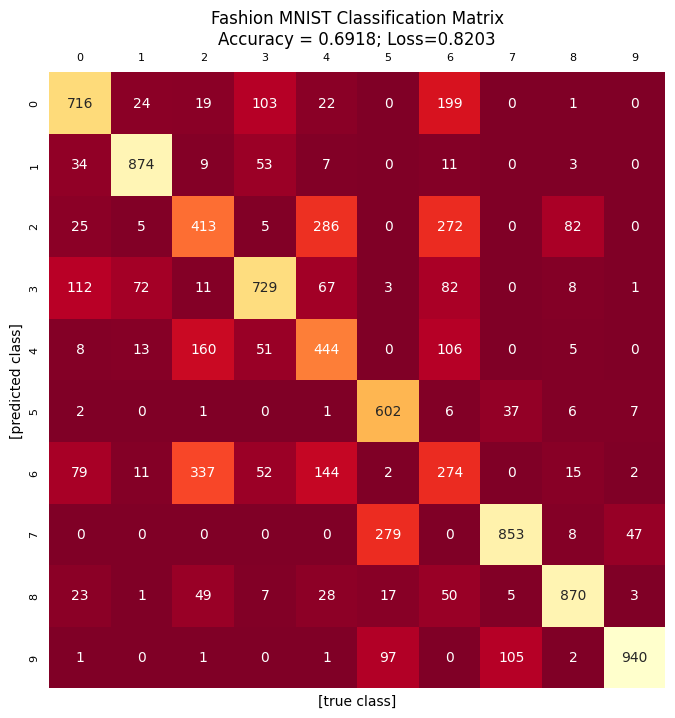

In [32]:
# define classification matrix of the predicted and target classes
mat = confusion_matrix(fashion_mnist_eval_data.targets, predictions.detach())
# initialize the plot and define size
plt.figure(figsize=(8,8))

# plot the confusion matrix as a heat map
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fashion_classes, yticklabels=fashion_classes)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom=False, bottom=False, top=False, left=False, labeltop=True)

# plot title and axis labels
plt.title('Fashion MNIST Classification Matrix\nAccuracy = 0.6918; Loss=0.8203')
plt.xlabel('[true class]')
plt.ylabel('[predicted class]')

###**3.3 Improved CNN.**

#### Implement and train your "improved" CNN
("improved" simply refers to a better classification accuracy than your baseline model)

This model architecture is similar to the baseline model but will include dropout regularization within the architecture with a dropout probability of 50%

In [33]:
# implement the network architecture
# (nn.Module gets the functionalities from the pytorch module)
class FashionMnistCNN(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(FashionMnistCNN, self).__init__()

        # specify convolution layer 1. (1 input channel w/ grayscale. output = features to extract)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=0)
        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # specify convolution layer 2. (input channels = output from before)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0)
        # define max-pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # classification part
        # specify first fully connected layer
        self.linear1 = nn.Linear(64*4*4, 600, bias=True) # linearity
        self.relu1 = nn.ReLU(inplace=True) # non-linearity
        # fully connected layer 2
        self.linear2 = nn.Linear(600, 120, bias=True)
        self.relu2 = nn.ReLU(inplace=True)
        # fully connected layer 3 (output is 10 for 10 fashion mnist classes)
        self.linear3 = nn.Linear(120, 10)
        # feed output of 3rd fc through softmax
        self.logsoftmax = nn.LogSoftmax(dim=1)

        # dropout layer
        self.dropout = nn.Dropout(0.5, inplace=True)

    # where it is glued together
    # define the forward pass
    def forward(self, images):

        # high level feature learning via convolutional layers
        # define conv layer 1 forward pass, max pooling, relu sneaks in a nonlinearity to help with learning
        x = self.pool1(self.relu1(self.conv1(images)))
        # define conv layer 2 forward pass
        x = self.pool2(self.relu2(self.conv2(x)))

        # feature flattening
        # reshape image pixels
        x = x.view(x.size(0), -1)

        # combination of feature learning via non-linear layers
        # define fully connected layer 1 forward pass
        x = self.relu1(self.dropout(self.linear1(x)))
        # define fc layer 2 forward pass
        x = self.relu2(self.dropout(self.linear2(x)))
        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x


Instantiate model and push to the computing device that we want.

In [34]:
# instantiate model
model = FashionMnistCNN()
# push to device
model = model.to(device)
# if GPU is enabled  we can double check that the model was pushed there
!nvidia-smi

Mon Apr 28 20:43:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P0             30W /   70W |     240MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Now we can view the architectural structure and the number of parameters.

In [35]:
# look at the architecture
print('[LOG] FashionMnistCNN architecture:\n\n{}\n'.format(model))

# look at the parameters
# first initialize the number of paramters
num_params = 0
# iterate over the distinct parameters
for param in model.parameters():
    # collect number of parameters
    num_params += param.numel()
#print number of parameters
print('[LOG] Number of FashionMnistCNN model parameters to be trained: {}.'.format(num_params))

[LOG] FashionMnistCNN architecture:

FashionMnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1024, out_features=600, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=600, out_features=120, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=120, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=True)
)

[LOG] Number of FashionMnistCNN model parameters to be trained: 740426.


We will use negative log likelihood loss again. This time we will use the Adam optimizer which adjusts the learning rate, but we do set the initial learning rate.

In [36]:
# define loss function
nll_loss = nn.NLLLoss()
#push initialized loss function to device
nll_loss = nll_loss.to(device)

# set the initial learning rate
learning_rate = .0001
# define optimization strategy (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

We will also use 50 epochs. From the base model, we saw that on 20 epochs, it was starting to converge but still needed some more epochs to be able to converge.

In [38]:
num_epochs = 50
mini_batch_size = 128

# dataloader
fashion_mnist_train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train_data, batch_size=mini_batch_size, shuffle=True)

Now we can train the (theoretically) better model. Note that the way this is named/stored, it will overwrite the model we trained above. That is ok for now since the model above trained so quickly - if I needed to go back and redo anything I could make a new folder and rename the other model.

In [39]:
# initialize collection of training epoch losses
train_epoch_losses = []

# set model in training mode
model.train()

# training the model
# iterate over the 20 epochs
for epoch in range(num_epochs):

    # initialize collection of mini-batch losses
    train_mini_batch_losses = []
    # iterate over all mini-batches
    for i, (images, labels) in enumerate(fashion_mnist_train_dataloader):
        # push mini-batch data to device
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        output = model(images)
        # reset graph gradients
        model.zero_grad()
        #determine classification loss
        loss = nll_loss(output, labels)

        # backward pass -- take the loss
        loss.backward()
        # calculate new parameters based on the loss
        optimizer.step()
        # collect mini-batch reconstruction loss
        train_mini_batch_losses.append(loss.data.item())

    # determine mean mini-batch loss for epoch
    train_epoch_loss = np.mean(train_mini_batch_losses)
    # print epoch loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))

    # set filename of model -- generate new name for each epoch
    model_name = 'fashion_mnist_model_epoch_{}.pth'.format(str(epoch))
    # save current model to gdrive models directory
    torch.save(model.state_dict(), os.path.join(models_directory, model_name))

    # append mean mini-batch loss of epoch
    train_epoch_losses.append(train_epoch_loss)

[LOG 20250428-20:44:51] epoch: 0 train-loss: 1.1535139468941353
[LOG 20250428-20:44:59] epoch: 1 train-loss: 0.6896387364691509
[LOG 20250428-20:45:06] epoch: 2 train-loss: 0.6035149357974656
[LOG 20250428-20:45:15] epoch: 3 train-loss: 0.5481057968348074
[LOG 20250428-20:45:23] epoch: 4 train-loss: 0.5082780754388269
[LOG 20250428-20:45:30] epoch: 5 train-loss: 0.4754279431249541
[LOG 20250428-20:45:38] epoch: 6 train-loss: 0.4438385042999345
[LOG 20250428-20:45:46] epoch: 7 train-loss: 0.41929560296062723
[LOG 20250428-20:45:54] epoch: 8 train-loss: 0.39841449537129797
[LOG 20250428-20:46:03] epoch: 9 train-loss: 0.3805755500091927
[LOG 20250428-20:46:10] epoch: 10 train-loss: 0.3646834034846027
[LOG 20250428-20:46:19] epoch: 11 train-loss: 0.35338966834392627
[LOG 20250428-20:46:27] epoch: 12 train-loss: 0.3414755467730545
[LOG 20250428-20:46:35] epoch: 13 train-loss: 0.33175946905541776
[LOG 20250428-20:46:43] epoch: 14 train-loss: 0.32351508879585306
[LOG 20250428-20:46:50] epoch:

Based on the loss per epoch, the model is performing better than the base model, at least on the training data. We can also plot this to be able to visualize it.

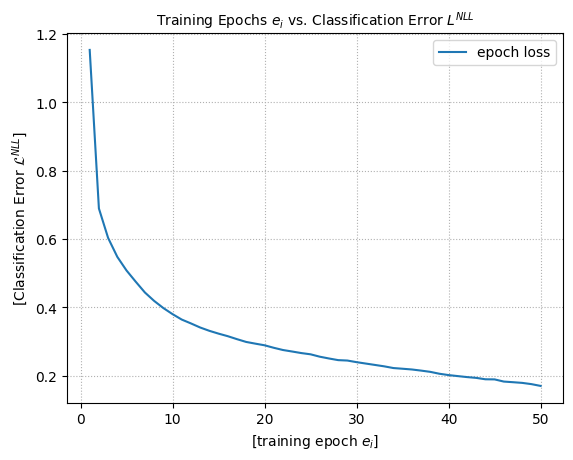

In [40]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle='dotted') # add grid

# plot the training epochs vs. the epochs' classification error
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss')

# add axis labels and title
ax.set_xlabel("[training epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)
plt.title('Training Epochs $e_i$ vs. Classification Error $L^{NLL}$', fontsize=10)

# set plot legend
plt.legend(loc="upper right", numpoints=1, fancybox=True)

This model looks like it would have converged if given more epochs, but even without the convergence, it looks to be performing better than the base model so I will not re-run it. I also do not want to risk overfitting to the training data (even though it could be underfitting as it is, but we will see how it performs on the evaluation data).

#### Evaluating the model

Now we can load the best performing model (the last one) in order to use this on the evaluation dataset.

In [41]:
# restore pre-trained model snapshot
best_model_name = '/content/drive/MyDrive/Colab Notebooks/models/fashion_mnist_model_epoch_49.pth'

# init pre-trained model class
best_model = FashionMnistCNN()

# load epoch 19 (best performing epoch) of trained model and put it on cpu (as opposed to gpu)
best_model.load_state_dict(torch.load(best_model_name, map_location=torch.device('cpu')))


<All keys matched successfully>

In [42]:
# set model in evaluation mode
best_model.eval()

FashionMnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1024, out_features=600, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=600, out_features=120, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=120, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=True)
)

Now we can evaluate the model and we can use the same fashion_mnist_eval_dataloader defined earlier.

In [43]:
# initialize collection of mini-batch losses
eval_mini_batch_losses = []

# iterate over all mini-batches
for i, (images, labels) in enumerate(fashion_mnist_eval_dataloader):

    # forward pass
    output = best_model(images)

    # determine classification loss
    loss = nll_loss(output, labels)

    # collect mini-batch reconstruction loss
    eval_mini_batch_losses.append(loss.data.item())

# determine mean mini-batch loss for epoch
eval_loss = np.mean(eval_mini_batch_losses)

# print epoch loss
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] eval-loss: {}'.format(str(now), str(eval_loss)))

[LOG 20250428-20:53:56] eval-loss: 0.24773672223091125


Getting the predictions for all observations and the overall accuracy.

In [44]:
# preds
predictions = torch.argmax(best_model(next(iter(fashion_mnist_eval_dataloader))[0]), dim=1)

# accuracy
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())

0.9151

The accuracy for this model is .9151, which is a huge improvement over the baseline model.

Finally, a confusion matrix to show where the highest misclassification happened.

Text(72.72222222222221, 0.5, '[predicted class]')

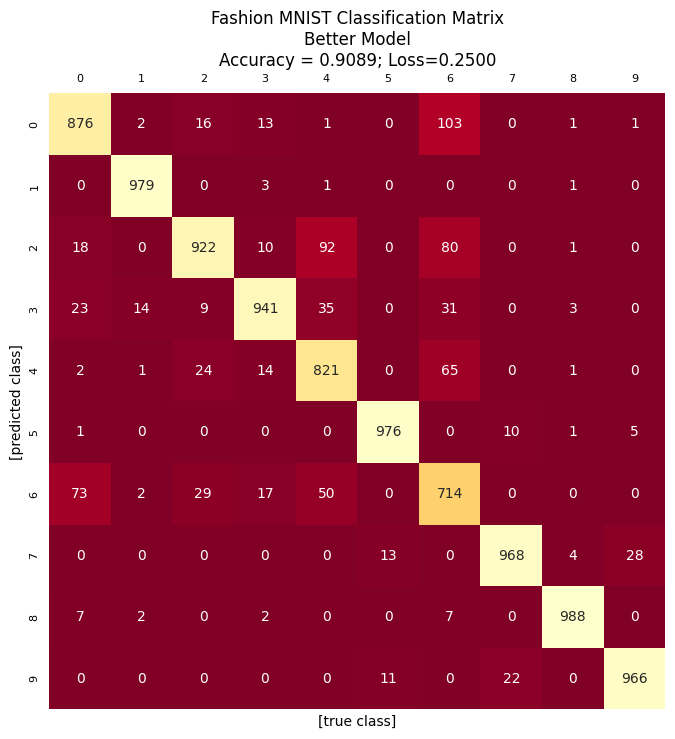

In [45]:
# define classification matrix of the predicted and target classes
mat = confusion_matrix(fashion_mnist_eval_data.targets, predictions.detach())
# initialize the plot and define size
plt.figure(figsize=(8,8))

# plot the confusion matrix as a heat map
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fashion_classes, yticklabels=fashion_classes)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom=False, bottom=False, top=False, left=False, labeltop=True)

# plot title and axis labels
plt.title('Fashion MNIST Classification Matrix\nBetter Model\nAccuracy = 0.9089; Loss=0.2500')
plt.xlabel('[true class]')
plt.ylabel('[predicted class]')